# Smarter Circuits #

In [71]:
import numpy
import matplotlib.pyplot as plt
import cv2
import featureRecognition as fr
import boundingBox as bb
import math
from classes import Rect

## Load Image ##

In [72]:
def loadImage(path, name):
    image = cv2.imread('{path}/{name}'.format(path=path,name=name))
    colorImage = numpy.empty_like(image)
    colorImage[:] = image
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image
    return numpy.asarray(colorImage), numpy.asarray(image)

def thinnImage(image):
    image = cv2.ximgproc.thinning(image)
    return image

### Preprocess Image ###

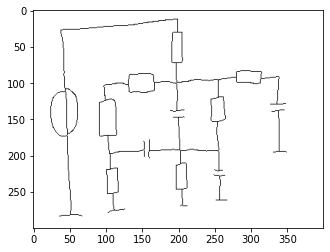

In [73]:
(colorImage, image) = loadImage("./testImages","raf1.png")
image = cv2.resize(image, (400,300), interpolation = cv2.INTER_AREA)
colorImage = cv2.resize(colorImage, (400,300), interpolation = cv2.INTER_AREA)

cv2.imwrite("resize.png", numpy.asarray(colorImage))

#for y in range(0,len(image)):
#    for x in range(0, len(image[y])):
#        if image[y][x] > 110:
#            image[y][x] = 255
#        else:
#            image[y][x] = 0

#cv2.imwrite("out.png", 255 - image)

image = thinnImage(image)

cv2.imwrite("binary.png",255 - numpy.asarray(image))

plt.imshow(image, cmap=plt.cm.binary)

## Feature Recognition ##

In [74]:
def drawFeatures(image, intersections, endPoints):
    for intersection in intersections:
        image[intersection.x][intersection.y] = (0,0,255)
    for endPoint in endPoints:
        image[endPoint.x][endPoint.y] = (0,255,0)
    return image

In [75]:
(endPoints, intersections) = fr.getFeatures(image=image)
colorImage = drawFeatures(colorImage, intersections, endPoints)
cv2.imwrite("features.png", numpy.asarray(colorImage))


True

## Bounding Box Creation ##

In [76]:
def drawRect(image, rect):
    startX = math.floor(rect.center.x - rect.radius)
    startY = math.floor(rect.center.y - rect.radius)

    endX = math.floor(rect.center.x + rect.radius)
    endY = math.floor(rect.center.y + rect.radius)
    
    for x in range(startX,endX):
        #image[startY][x] = (0,255,0)
        #image[endY][x] = (0,255,0)
        try:
            image[x][startY] = (0,255,0)
            image[x][endY] = (0,255,0)
        except:
            pass

    for y in range(startY,endY):
        #image[y][startX] = (0,255,0)
        #image[y][endX] = (0,255,0)
        try:
            image[startX][y] = (0,255,0)
            image[endX][y] = (0,255,0)
        except:
            pass

    return image

## Draw Bounding Boxes and Features ##

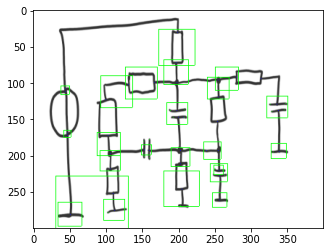

In [77]:
boundingBoxes = bb.getBoundingBox(intersectionList=intersections, endPointList=endPoints)
for box in boundingBoxes:
    drawRect(colorImage, box)

colorImage = drawFeatures(colorImage, intersections, endPoints)

cv2.imwrite("out.png", numpy.asarray(colorImage))
plt.imshow(colorImage, cmap=plt.cm.binary)